In [1]:
# Required packages
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline 

In [2]:
#loading train and test data into dataframe
df_train=pd.read_csv("train_Df64byy.csv",delimiter=',')
df_test=pd.read_csv("test_YCcRUnU.csv",delimiter=',')

In [3]:
df_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### Data Exploration

In [5]:
print(df_train.shape)
print(df_train.dtypes)

(50882, 14)
ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object


In [7]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64


In [8]:
print("Acomodation Type:\n" , df_train.Accomodation_Type.value_counts())
print("Reco Insurance Type:\n" , df_train.Reco_Insurance_Type.value_counts())

Acomodation Type:
 Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64
Reco Insurance Type:
 Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64


In [10]:
print(df_train.Upper_Age.max(),df_train.Upper_Age.min())
print(df_train.Lower_Age.max(),df_train.Lower_Age.min())

75 18
75 16


In [11]:
df_train.Is_Spouse.value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [12]:
print(df_train['Health Indicator'].value_counts())
print(df_train.Holding_Policy_Duration.value_counts())
print(df_train.Holding_Policy_Type.value_counts())

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64
1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64


<AxesSubplot:xlabel='Accomodation_Type,Is_Spouse'>

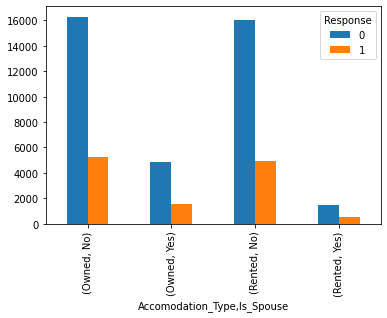

In [13]:
df_train.groupby(['Accomodation_Type','Is_Spouse','Response'])['Response'].count().unstack('Response').plot.bar()


<AxesSubplot:xlabel='Reco_Insurance_Type'>

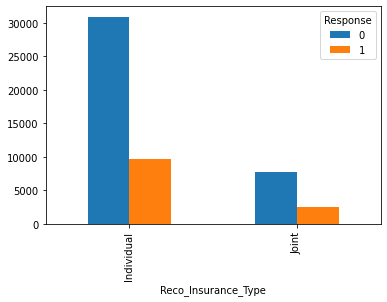

In [14]:
df_train.groupby(['Reco_Insurance_Type','Response'])['Response'].count().unstack('Response').plot.bar()

<AxesSubplot:xlabel='Reco_Policy_Cat'>

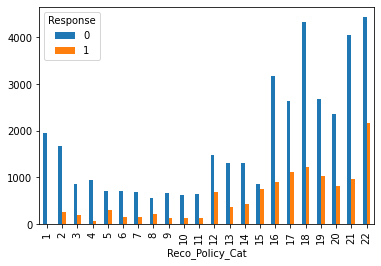

In [18]:
df_train.groupby(['Reco_Policy_Cat','Response'])['Response'].count().unstack('Response').plot.bar()

In [113]:
bins = [16, 30, 45, 60, 75]
labels = ['16-30', '21-45', '46-60', '61-75']
df_train['Upper_agegroup'] = pd.cut(df_train.Upper_Age, bins, labels = labels,include_lowest = True)
df_train['Lower_agegroup'] = pd.cut(df_train.Lower_Age, bins, labels = labels,include_lowest = True)

df_test['Upper_agegroup'] = pd.cut(df_test.Upper_Age, bins, labels = labels,include_lowest = True)
df_test['Lower_agegroup'] = pd.cut(df_test.Lower_Age, bins, labels = labels,include_lowest = True)



<AxesSubplot:xlabel='Upper_agegroup'>

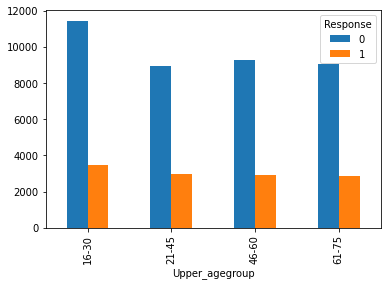

In [16]:
df_train.groupby(['Upper_agegroup','Response'])['Response'].count().unstack('Response').plot.bar()

<AxesSubplot:xlabel='Health Indicator'>

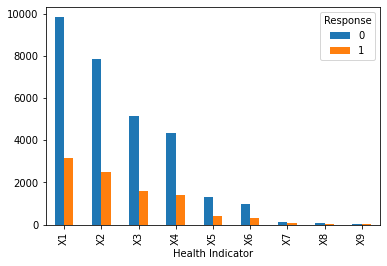

In [19]:
df_train.groupby(['Health Indicator','Response'])['Response'].count().unstack('Response').plot.bar()

<AxesSubplot:xlabel='Holding_Policy_Duration'>

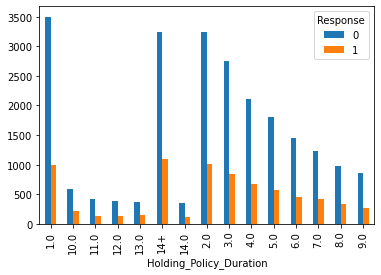

In [20]:
df_train.groupby(['Holding_Policy_Duration','Response'])['Response'].count().unstack('Response').plot.bar()

<AxesSubplot:xlabel='Holding_Policy_Type'>

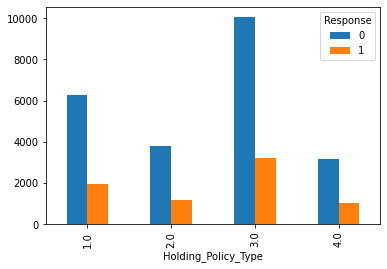

In [21]:
df_train.groupby(['Holding_Policy_Type','Response'])['Response'].count().unstack('Response').plot.bar()

Imputing missing values in both train and test dataframe

In [22]:
df_train['Health Indicator'].fillna(df_train['Health Indicator'].mode()[0], inplace=True)
df_train['Holding_Policy_Duration'].fillna(0, inplace=True)
df_train['Holding_Policy_Type'].fillna(0, inplace=True)

df_test['Health Indicator'].fillna(df_test['Health Indicator'].mode()[0], inplace=True)
df_test['Holding_Policy_Duration'].fillna(0, inplace=True)
df_test['Holding_Policy_Type'].fillna(0, inplace=True)

In [114]:
print("Train dataset:\n", df_train.isna().sum())
print("Test dataset:\n",df_test.isna().sum())

Train dataset:
 ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
Upper_agegroup             0
Lower_agegroup             0
dtype: int64
Test dataset:
 ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Upper_agegroup             0
Lower_agegroup             0
dtype: int64


### Feature Engineering

In [26]:
#Making 14+ to a number to make the column numeric datatype

df_train['Holding_Policy_Duration'] = df_train['Holding_Policy_Duration'].replace(['14+'],'15.0')
df_test['Holding_Policy_Duration'] = df_test['Holding_Policy_Duration'].replace(['14+'],'15.0')


print(df_train.Holding_Policy_Duration.value_counts())
print(df_test.Holding_Policy_Duration.value_counts())

0       20251
1.0      4499
15.0     4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64
0       8603
15.0    1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64


In [115]:
print(df_train.dtypes)
print(df_test.dtypes)

ID                            int64
City_Code                  category
Region_Code                   int64
Accomodation_Type             int64
Reco_Insurance_Type           int64
Upper_Age                     int64
Lower_Age                     int64
Is_Spouse                     int64
Health Indicator           category
Holding_Policy_Duration     float64
Holding_Policy_Type         float64
Reco_Policy_Cat               int64
Reco_Policy_Premium         float64
Response                      int64
Upper_agegroup             category
Lower_agegroup             category
dtype: object
ID                            int64
City_Code                  category
Region_Code                   int64
Accomodation_Type             int64
Reco_Insurance_Type           int64
Upper_Age                     int64
Lower_Age                     int64
Is_Spouse                     int64
Health Indicator           category
Holding_Policy_Duration     float64
Holding_Policy_Type         float64
Reco_Policy_Ca

In [28]:
#Convert object datatype to numeric

df_train['Accomodation_Type'].replace(to_replace=['Rented','Owned'], value=[0,1],inplace=True)
df_train['Reco_Insurance_Type'].replace(to_replace=['Individual','Joint'], value=[0,1],inplace=True)
df_train['Is_Spouse'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)

df_test['Accomodation_Type'].replace(to_replace=['Rented','Owned'], value=[0,1],inplace=True)
df_test['Reco_Insurance_Type'].replace(to_replace=['Individual','Joint'], value=[0,1],inplace=True)
df_test['Is_Spouse'].replace(to_replace=['No','Yes'], value=[0,1],inplace=True)

In [29]:
df_train['Holding_Policy_Duration'] = df_train['Holding_Policy_Duration'].astype(dtype="float64")
df_test['Holding_Policy_Duration'] = df_test['Holding_Policy_Duration'].astype(dtype="float64")

In [30]:
##Convert object datatype to categorical

df_train['City_Code'] = df_train['City_Code'].astype(dtype="category")
df_train['Health Indicator'] = df_train['Health Indicator'].astype(dtype="category")

df_test['City_Code'] = df_test['City_Code'].astype(dtype="category")
df_test['Health Indicator'] = df_test['Health Indicator'].astype(dtype="category")

In [32]:
print(df_train.dtypes)
print(df_test.dtypes)

ID                            int64
City_Code                  category
Region_Code                   int64
Accomodation_Type             int64
Reco_Insurance_Type           int64
Upper_Age                     int64
Lower_Age                     int64
Is_Spouse                     int64
Health Indicator           category
Holding_Policy_Duration     float64
Holding_Policy_Type         float64
Reco_Policy_Cat               int64
Reco_Policy_Premium         float64
Response                      int64
Upper_agegroup             category
Lower_agegroup             category
dtype: object
ID                            int64
City_Code                  category
Region_Code                   int64
Accomodation_Type             int64
Reco_Insurance_Type           int64
Upper_Age                     int64
Lower_Age                     int64
Is_Spouse                     int64
Health Indicator           category
Holding_Policy_Duration     float64
Holding_Policy_Type         float64
Reco_Policy_Ca

In [121]:
X=df_train.drop(['ID','Upper_Age','Lower_Age','Response'],axis=1)
y=df_train['Response']

In [122]:
X.shape, X.dtypes, y.shape, y.dtypes

((50882, 12),
 City_Code                  category
 Region_Code                   int64
 Accomodation_Type             int64
 Reco_Insurance_Type           int64
 Is_Spouse                     int64
 Health Indicator           category
 Holding_Policy_Duration     float64
 Holding_Policy_Type         float64
 Reco_Policy_Cat               int64
 Reco_Policy_Premium         float64
 Upper_agegroup             category
 Lower_agegroup             category
 dtype: object,
 (50882,),
 dtype('int64'))

In [123]:
#One hot encoding to convert categorical to binary by using dummies

X_dummy = pd.get_dummies(X[['City_Code','Upper_agegroup','Lower_agegroup','Health Indicator']])
X = pd.concat([X,X_dummy],axis=1)
print(X.shape)
print(X.columns)

(50882, 65)
Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Upper_agegroup', 'Lower_agegroup', 'City_Code_C1', 'City_Code_C10',
       'City_Code_C11', 'City_Code_C12', 'City_Code_C13', 'City_Code_C14',
       'City_Code_C15', 'City_Code_C16', 'City_Code_C17', 'City_Code_C18',
       'City_Code_C19', 'City_Code_C2', 'City_Code_C20', 'City_Code_C21',
       'City_Code_C22', 'City_Code_C23', 'City_Code_C24', 'City_Code_C25',
       'City_Code_C26', 'City_Code_C27', 'City_Code_C28', 'City_Code_C29',
       'City_Code_C3', 'City_Code_C30', 'City_Code_C31', 'City_Code_C32',
       'City_Code_C33', 'City_Code_C34', 'City_Code_C35', 'City_Code_C36',
       'City_Code_C4', 'City_Code_C5', 'City_Code_C6', 'City_Code_C7',
       'City_Code_C8', 'City_Code_C9', 'Upper_agegroup_16-30',
       'Upper_agegroup_21-45', 'Upper

In [124]:
X = X.drop(['City_Code','Upper_agegroup','Lower_agegroup','Health Indicator'],axis=1)
print(X.shape)

(50882, 61)


In [154]:
X_test=df_test.drop(['ID','Upper_Age','Lower_Age'],axis=1)
X_testdummy = pd.get_dummies(X_test[['City_Code','Upper_agegroup','Lower_agegroup','Health Indicator']])


X_test=pd.concat([X_test,X_testdummy],axis=1)
X_test = X_test.drop(['City_Code','Upper_agegroup','Lower_agegroup','Health Indicator'],axis=1)

print(X_test.shape)
print(X_test.columns)

(21805, 61)
Index(['Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'City_Code_C1', 'City_Code_C10', 'City_Code_C11',
       'City_Code_C12', 'City_Code_C13', 'City_Code_C14', 'City_Code_C15',
       'City_Code_C16', 'City_Code_C17', 'City_Code_C18', 'City_Code_C19',
       'City_Code_C2', 'City_Code_C20', 'City_Code_C21', 'City_Code_C22',
       'City_Code_C23', 'City_Code_C24', 'City_Code_C25', 'City_Code_C26',
       'City_Code_C27', 'City_Code_C28', 'City_Code_C29', 'City_Code_C3',
       'City_Code_C30', 'City_Code_C31', 'City_Code_C32', 'City_Code_C33',
       'City_Code_C34', 'City_Code_C35', 'City_Code_C36', 'City_Code_C4',
       'City_Code_C5', 'City_Code_C6', 'City_Code_C7', 'City_Code_C8',
       'City_Code_C9', 'Upper_agegroup_16-30', 'Upper_agegroup_21-45',
       'Upper_agegroup_46-60', 'Upper_agegroup_61-75', 'Lower_agegroup_16-30',
       'Lo

### Modeling

In [126]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection as skms
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
XGB=XGBClassifier()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV







In [127]:
X_train , X_valid, y_train, y_valid = train_test_split(X,y, 
                                                       test_size=0.2, 
                                                       random_state=1, 
                                                       stratify=y)

The Evaluation metric is ROC_AUC_SCORE

In [128]:
logreg=lr.fit(X_train, y_train)

In [129]:
ypred_lr=logreg.predict_proba(X_valid)[:,1]

In [130]:
print("The ROC_AUC_SCORE with Logistic Regression is :",roc_auc_score(y_valid, ypred_lr))

The ROC_AUC_SCORE with Logistic Regression is : 0.532713391536921


In [131]:
randfor=rf.fit(X_train, y_train)

In [132]:
ypred_rf=randfor.predict_proba(X_valid)[:,1]

In [133]:
print("The ROC_AUC_SCORE with Random Forest is :",roc_auc_score(y_valid, ypred_rf))

The ROC_AUC_SCORE with Random Forest is : 0.6046998841116488


In [134]:
xgboost=XGB.fit(X_train, y_train)

In [135]:
ypred_xgb=xgboost.predict_proba(X_valid)[:,1]

In [136]:
print("The ROC_AUC_SCORE with XGB Classifier is :",roc_auc_score(y_valid, ypred_xgb))

The ROC_AUC_SCORE with XGB Classifier is : 0.6671904142492378


Tuning parameters for XGB Classifier with GridSearch

In [92]:
XGBMODEL=XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(XGBMODEL, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 46.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 53.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 71.8min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [137]:
XGB=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
xgboost=XGB.fit(X_train, y_train)

In [139]:
ypred_xgb=xgboost.predict_proba(X_valid)[:,1]

In [140]:
print("The ROC_AUC_SCORE with optimized XGB Classifier is :",roc_auc_score(y_valid, ypred_xgb))

The ROC_AUC_SCORE with optimized XGB Classifier is : 0.679264641029347


Cross validation to improve performance

In [99]:
#model = XGBClassifier()
print(cross_val_score(XGB, X, y, scoring="roc_auc", cv = 7))
mean_score = cross_val_score(XGB, X, y, scoring="roc_auc", cv = 7).mean()
std_score = cross_val_score(XGB, X, y, scoring="roc_auc", cv = 7).std()

print("The ROC_AUC_SCORE with XGB Classifier with Cross Validation is :",mean_score)
print(std_score)

[0.67985465 0.66084235 0.68562062 0.68074614 0.68743073 0.67121615
 0.68065134]
The ROC_AUC_SCORE with XGB Classifier with Cross Validation is : 0.6780517094183959
0.008497142895147983


In [100]:

kfold = StratifiedKFold(n_splits=10, random_state=7)
print(cross_val_score(XGB, X, y, scoring="roc_auc",cv=kfold))
mean_score=cross_val_score(XGB, X, y, scoring="roc_auc",cv=kfold).mean()
std_score=cross_val_score(XGB, X, y, scoring="roc_auc",cv=kfold).std()
print("The ROC_AUC_SCORE with XGB Classifier with Stratified kfold Cross Validation is :",mean_score)
print(std_score)

/Users/phanisingaraju/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.68525373 0.67737423 0.6743417  0.68431595 0.68595883 0.67925285
 0.68049713 0.67420552 0.68732584 0.6767196 ]
The ROC_AUC_SCORE with XGB Classifier with Stratified kfold Cross Validation is : 0.6805245378052752
0.004655176929252263


Prediction for the Test data

In [146]:
result=pd.read_csv("sample_submission_QrCyCoT.csv",delimiter=',')

In [155]:
X_test.shape

(21805, 61)

In [156]:
ypred_xgb=xgboost.predict_proba(X_test)[:,1]

In [157]:
ypred_xgb

array([0.16417433, 0.4392957 , 0.29548243, ..., 0.02649022, 0.3183903 ,
       0.13294253], dtype=float32)

In [158]:
result['Response']=ypred_xgb

In [148]:
result.shape

(21805, 2)

In [161]:
result.head()

,ID,Response
0,50883,0.164174
1,50884,0.439296
2,50885,0.295482
3,50886,0.225372
4,50887,0.166161
